Name:Kruti Mahalle



Roll.no: 16

Sec: 'A'

Mini Project Deep Learning


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

# Label the data
fake['label'] = 0  # Fake news
true['label'] = 1  # Real news

# Combine and shuffle
data = pd.concat([fake, true]).sample(frac=1).reset_index(drop=True)

# Use the text column
texts = data['text'].astype(str).values
labels = data['label'].values


In [5]:
# Vectorize using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(texts).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)

# FNN Model
model_fnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_fnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_fnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate
y_pred_fnn = (model_fnn.predict(X_test) > 0.5).astype("int32")
print("FNN Accuracy:", accuracy_score(y_test, y_pred_fnn))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9052 - loss: 0.2562 - val_accuracy: 0.9873 - val_loss: 0.0367
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9938 - loss: 0.0214 - val_accuracy: 0.9896 - val_loss: 0.0346
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9981 - loss: 0.0089 - val_accuracy: 0.9903 - val_loss: 0.0309
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9898 - val_loss: 0.0424
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9908 - val_loss: 0.0447
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
FNN Accuracy: 0.9900890868596882


In [6]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=500)

# Split for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(padded, labels, test_size=0.2, random_state=42)

# LSTM Model
model_lstm = Sequential([
    Embedding(10000, 64, input_length=500),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate
y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype("int32")
print("LSTM Accuracy:", accuracy_score(y_test_lstm, y_pred_lstm))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


449/449 ━━━━━━━━━━━━━━━━━━━━ 367s 805ms/step - accuracy: 0.8989 - loss: 0.2305 - val_accuracy: 0.9921 - val_loss: 0.0305
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 363s 809ms/step - accuracy: 0.9825 - loss: 0.0593 - val_accuracy: 0.9820 - val_loss: 0.0529
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 383s 811ms/step - accuracy: 0.9910 - loss: 0.0293 - val_accuracy: 0.9910 - val_loss: 0.0320
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 392s 834ms/step - accuracy: 0.9967 - loss: 0.0133 - val_accuracy: 0.9829 - val_loss: 0.0815
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 370s 807ms/step - accuracy: 0.9915 - loss: 0.0303 - val_accuracy: 0.9901 - val_loss: 0.0324
281/281 ━━━━━━━━━━━━━━━━━━━━ 35s 125ms/step
LSTM Accuracy: 0.9894209354120267


In [10]:
print("\n LSTM Classification Report:\n", classification_report(y_test_lstm, y_pred_lstm))


 LSTM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      4645
           1       0.98      1.00      0.99      4335

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



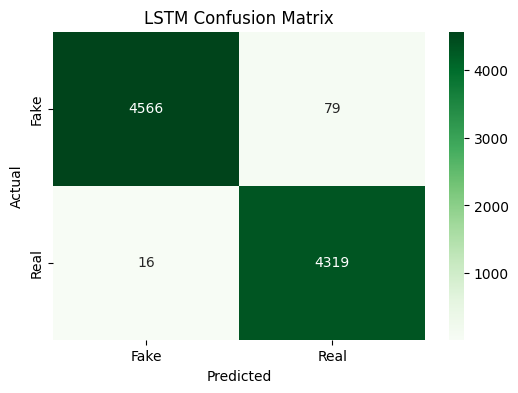

In [9]:
!pip install seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix # Import confusion_matrix

# Confusion Matrix - LSTM
cm_lstm = confusion_matrix(y_test_lstm, y_pred_lstm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()